In [3]:
import numpy as np
import torch
import os 
import matplotlib.pyplot as plt

## Make the plots 

### For robot navigation example

In [ ]:
# Load the file
current_dir = os.getcwd()
filename = current_dir + "/robot_nav/stats_robot_nav_sl.pt"
sl_results = torch.load(filename)
filename = current_dir + "/robot_nav/stats_robot_nav_ssl.pt"
ssl_results = torch.load(filename)
filename = current_dir + "/robot_nav/stats_robot_nav_hl_1.pt"
hl_results = torch.load(filename)
print(sl_results.keys())


dict_keys(['obj_val', 'opt_obj_val', 'slack_penalty', 'y_penalty', 'constraint_violation_magnitude', 'constraint_violation_count', 'constraint_violation_percentage', 'supervised_loss', 'bit_accuracy', 'optimality_gap'])


/tmp/ipykernel_2186948/3150438618.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
/tmp/ipykernel_2186948/3150438618.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
/tmp/ipykernel_2186948/3150438618.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)


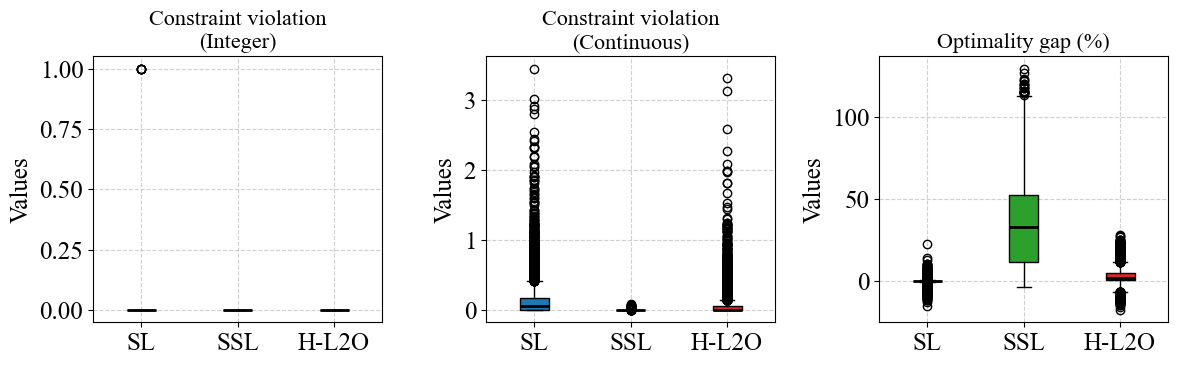

In [ ]:
# Configure global font settings
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

y_penalty = [hl_results["y_penalty"], ssl_results["y_penalty"], sl_results["y_penalty"]]
slack_penalty = [np.maximum(0, sl_results["slack_penalty"]), 
                np.maximum(0, ssl_results["slack_penalty"]), 
                np.maximum(0, hl_results["slack_penalty"])]
bit_accuracy = [sl_results["bit_accuracy"]*100, ssl_results["bit_accuracy"]*100, hl_results["bit_accuracy"]*100]
optimality_gap = [sl_results["optimality_gap"], ssl_results["optimality_gap"],  hl_results["optimality_gap"]]
all_data = [y_penalty, slack_penalty, optimality_gap]
labels=["SL", "SSL", "H-L2O"]
titles = ["Constraint violation\n(Integer)", "Constraint violation\n(Continuous)", "Optimality gap (%)"]
colors = ["#1f77b4", "#2ca02c", "#d62728"]  # blue, green, red

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # <-- removed sharey=True

for i, ax in enumerate(axes):
    bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
    for median in bp["medians"]:
        median.set_color("black")
        median.set_linewidth(2)

    ax.set_title(titles[i], fontsize = 16)
    ax.set_ylabel("Values")
    ax.grid(True, linestyle="--", alpha=0.6)

# fig.suptitle("Statstical comparsion for robot navigation example", fontsize=20)
plt.tight_layout()
plt.savefig("robot_nav_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()


### For thermal tank example

In [116]:
# Load the file
current_dir = os.getcwd()
filename = current_dir + "/energy/stats_energy_tank_sl.pt"
sl_results = torch.load(filename)
filename = current_dir + "/energy/stats_energy_tank_ssl.pt"
ssl_results = torch.load(filename)
filename = current_dir + "/energy/stats_energy_tank_hl_2.pt"
hl_results = torch.load(filename)
print(sl_results.keys())


dict_keys(['obj_val', 'opt_obj_val', 'optimality_gap', 'slack_penalty', 'y_penalty', 'supervised_loss', 'bit_accuracy'])


/tmp/ipykernel_2186948/843335083.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
/tmp/ipykernel_2186948/843335083.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
/tmp/ipykernel_2186948/843335083.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)


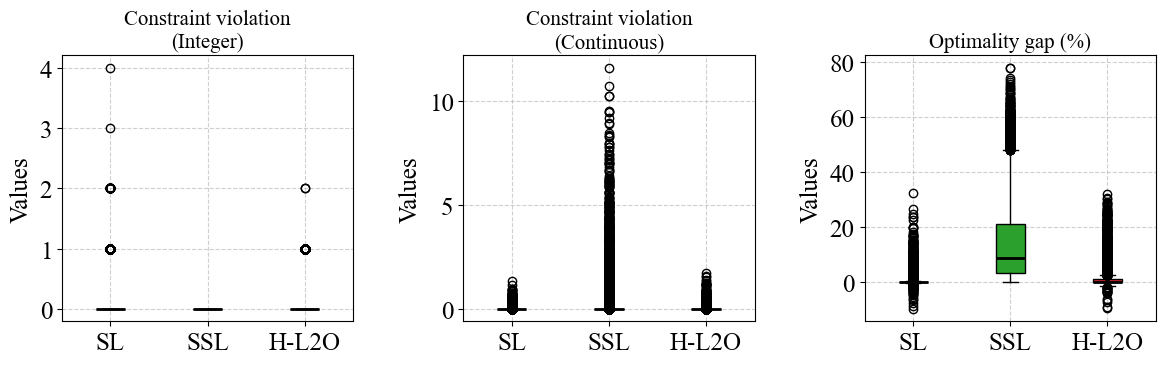

In [120]:
# Configure global font settings
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

y_penalty = [sl_results["y_penalty"], ssl_results["y_penalty"], hl_results["y_penalty"]]
slack_penalty = [sl_results["slack_penalty"], ssl_results["slack_penalty"], hl_results["slack_penalty"]]
bit_accuracy = [sl_results["bit_accuracy"]*100, ssl_results["bit_accuracy"]*100, hl_results["bit_accuracy"]*100]
optimality_gap = [sl_results["optimality_gap"], ssl_results["optimality_gap"],  hl_results["optimality_gap"]]
all_data = [y_penalty, slack_penalty, optimality_gap]
labels=["SL", "SSL", "H-L2O"]
titles = ["Constraint violation\n(Integer)", "Constraint violation\n(Continuous)", "Optimality gap (%)"]
colors = ["#1f77b4", "#2ca02c", "#d62728"]  # blue, green, red

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # <-- removed sharey=True

for i, ax in enumerate(axes):
    bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
    for median in bp["medians"]:
        median.set_color("black")
        median.set_linewidth(2)

    ax.set_title(titles[i], fontsize = 15)
    ax.set_ylabel("Values")
    ax.grid(True, linestyle="--", alpha=0.6)

# fig.suptitle("Statstical comparsion for thermal energy tank example", fontsize=20)
plt.tight_layout()
plt.savefig("thermal_tank_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()
